**Author**: Chaorong Chen (c.chen@uci.edu)

**Content**: This Jupyter notebook demonstrates briefly how to use MESA to analyze various types of features/datasets, build a single modality, and integrate the results of the single modality into a multimodality. In this case, we generated two datasets at random for demonstration purposes, all with identical sample labels. The results showed that multimodality outperformed single-modality by taking informatic features from both single-modalities.


# Import


In [1]:
from mesa import *
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification

In [3]:
def plot_ROC(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.plot(fpr, tpr, label="AUC=" + str(auc))
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.legend(loc=4)
    plt.show()


# Create random datasets for testing


In [4]:
sample_size = 100
dataset1, label = make_classification(
    n_samples=sample_size,
    n_features=50,
    n_informative=30,
    n_redundant=5,
    random_state=0,
    shuffle=False,
)

dataset2, label_ = make_classification(
    n_samples=sample_size,
    n_features=40,
    n_informative=20,
    n_redundant=5,
    random_state=0,
    shuffle=False,
)

In [5]:
dataset1 = pd.DataFrame(
    dataset1,
    columns=["feature_1_" + str(_) for _ in range(50)],
    index=[("Cancer" if _ == 1 else "Normal") for _ in label],
)
dataset2 = pd.DataFrame(
    dataset2,
    columns=["feature_2_" + str(_) for _ in range(40)],
    index=[("Cancer" if _ == 1 else "Normal") for _ in label],
)

In [6]:
dataset1.head()

,feature_1_0,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_1_6,feature_1_7,feature_1_8,feature_1_9,...,feature_1_40,feature_1_41,feature_1_42,feature_1_43,feature_1_44,feature_1_45,feature_1_46,feature_1_47,feature_1_48,feature_1_49
Normal,1.287909,-2.814107,5.473369,1.000398,-5.377724,2.578407,4.957609,5.549194,4.521393,-0.673910,...,-0.808648,-1.090128,-0.310668,-0.163263,-0.460341,-1.334141,0.515452,-0.489945,0.303284,2.452996
Normal,-4.771543,-0.241228,-2.369615,-0.113842,1.897924,-3.769209,-4.266361,-0.306406,0.938812,-1.595650,...,0.233836,-1.139200,-0.010400,-0.520939,-1.089221,-0.346203,-1.845407,-2.598922,0.198222,-0.484180
Normal,-6.221846,-0.895383,-5.402450,0.800162,-4.350093,-1.379873,-2.861613,-3.933458,0.162566,3.951797,...,-0.011214,1.344760,-0.831492,-0.407972,-1.330804,0.352599,-0.537885,0.393444,0.286518,2.042536
Normal,-2.707960,-2.634845,-0.249780,-6.051963,-2.625645,-7.131393,-6.267024,-3.482308,-0.386723,0.013046,...,-1.286241,-1.654657,0.037233,1.270301,-0.143277,0.795255,-0.072072,-0.742424,1.225654,-2.205388
Normal,-4.544210,-8.059180,1.540083,2.278422,0.945999,0.502495,2.860353,2.883449,-0.872265,-0.587037,...,-0.163390,-0.320882,-0.403431,-0.664067,-0.116287,-0.416404,-0.210625,2.611800,-0.817096,0.229693


In [7]:
dataset2.head()

,feature_2_0,feature_2_1,feature_2_2,feature_2_3,feature_2_4,feature_2_5,feature_2_6,feature_2_7,feature_2_8,feature_2_9,...,feature_2_30,feature_2_31,feature_2_32,feature_2_33,feature_2_34,feature_2_35,feature_2_36,feature_2_37,feature_2_38,feature_2_39
Normal,0.587537,2.054228,2.482452,1.987293,-0.225705,-0.316794,-5.122716,-3.531124,-0.876153,0.386240,...,1.612729,1.514182,0.231019,-1.099532,0.087001,0.047305,0.239624,-0.978221,-1.523000,0.162363
Normal,1.047819,-3.198545,0.431850,3.980836,-0.711914,1.590138,-0.367283,-5.113099,-1.915103,-1.739222,...,-0.743228,-0.395222,-0.825779,0.089620,-1.905818,-0.568086,-0.515757,1.263930,0.150698,0.695518
Normal,4.119862,0.357263,2.497668,2.361794,0.545406,0.023542,-2.063180,1.454372,1.124741,-1.641444,...,0.182100,0.945539,-0.201385,1.510525,-0.571478,0.665589,0.003616,1.546672,0.214406,-1.877313
Normal,0.163917,-2.979125,2.081287,1.297267,-2.326978,-1.665403,-1.694075,1.194223,-1.432739,-0.581854,...,0.599987,-0.768383,-0.836130,1.810582,-0.787033,-0.584771,-1.708321,1.629982,0.397998,0.237780
Normal,4.574918,-3.519502,3.023815,-0.985212,1.360107,1.592550,2.360250,-6.157739,4.505007,-3.852737,...,1.311427,-0.018429,-0.323289,0.236225,-0.752582,0.045113,3.427539,0.604682,1.668311,-0.355083


In [8]:
from sklearn.model_selection import train_test_split
# create train/test datasets for each modality
# To perform the MESA multimodal integration later, the label for each dataset should be matched
train_index, test_index, y_train, y_test = train_test_split(
    np.arange(100), label, test_size=0.2, random_state=42,shuffle=True
)
dataset1_train, dataset1_test = dataset1.iloc[train_index], dataset1.iloc[test_index]
dataset2_train, dataset2_test = dataset2.iloc[train_index], dataset2.iloc[test_index]

# Run MESA


## Single modality


In [9]:
random_state = 0

In [16]:
# Construct single modalities
# Single modality analysis
modality_1 = MESA_modality(
    top_n=10,
    classifier=RandomForestClassifier(random_state=0),
    variance_threshold=0,
    normalization=True,
)
modality_1.fit(dataset1_train, y_train)
predictions_1 = modality_1.transform_predict_proba(dataset1_test)

modality_2 = MESA_modality(
    top_n=20,
    classifier=LogisticRegression(random_state=0),
    variance_threshold=0,
    normalization=False,
    missing=0,
)
modality_2.fit(dataset2_train, y_train)
predictions_2 = modality_2.transform_predict_proba(dataset2_test)

/dfs10/weil21-lab2/chaoronc/envs/py313/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=2000 is greater than n_features=50. All the features will be returned.
  warnings.warn(
/dfs10/weil21-lab2/chaoronc/envs/py313/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=2000 is greater than n_features=40. All the features will be returned.
  warnings.warn(


In [39]:
predictions_1

array([[0.51, 0.49],
       [0.66, 0.34],
       [0.77, 0.23],
       [0.25, 0.75],
       [0.9 , 0.1 ],
       [0.43, 0.57],
       [0.78, 0.22],
       [0.12, 0.88],
       [0.73, 0.27],
       [0.44, 0.56],
       [0.12, 0.88],
       [0.54, 0.46],
       [0.58, 0.42],
       [0.75, 0.25],
       [0.17, 0.83],
       [0.74, 0.26],
       [0.42, 0.58],
       [0.19, 0.81],
       [0.46, 0.54],
       [0.84, 0.16]])

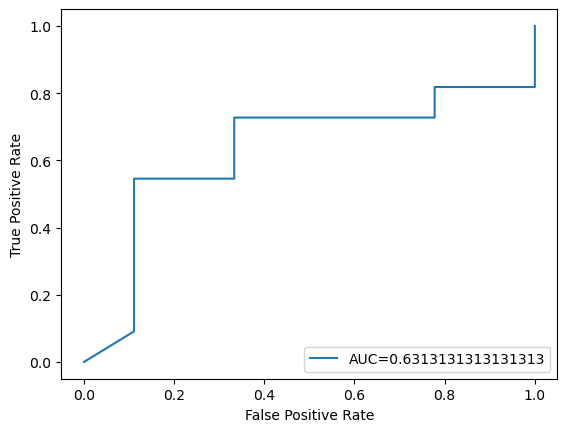

In [41]:
# ROC curve for modality_1 on dataset1
y_pred_1 = predictions_1[:, 1]
plot_ROC(y_true=y_test, y_pred = y_pred_1)

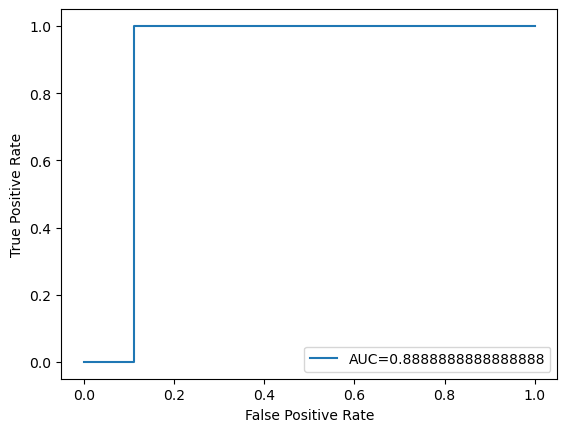

In [42]:
# ROC curve for modality_2 on dataset1
y_pred_2 = predictions_2[:, 1]
plot_ROC(y_true=y_test, y_pred = y_pred_2)

## Multimodality


In [38]:
# Define modality-specific configurations
modalities = [
    modality_1,
    modality_2
]

# Create MESA ensemble
mesa = MESA(
    modalities=modalities,
    meta_estimator=LogisticRegression(random_state=42),
    random_state=42
)

# Fit the ensemble
X_list = [dataset1_train, dataset2_train]
mesa.fit(X_list, y_train)
X_test_list = [dataset1_test, dataset2_test]
mesa_prediction = mesa.predict_proba(X_test_list)

/dfs10/weil21-lab2/chaoronc/envs/py313/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=2000 is greater than n_features=50. All the features will be returned.
  warnings.warn(
/dfs10/weil21-lab2/chaoronc/envs/py313/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=2000 is greater than n_features=40. All the features will be returned.
  warnings.warn(


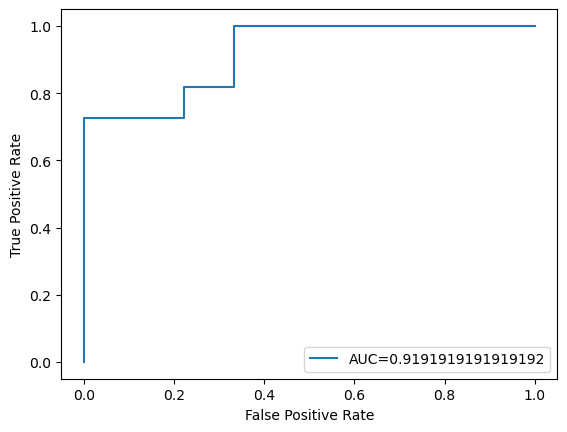

In [39]:
# ROC curve for modality_2 on dataset1
y_pred_mesa = mesa_prediction[:, 1]
plot_ROC(y_true=y_test, y_pred = y_pred_mesa)

## Let's plot them together


We can see that the prediction accuaracy/AUC increased dramatically as it took informatic features from both datasets after integration(Logistic Regression(LR) as base estimator for example)


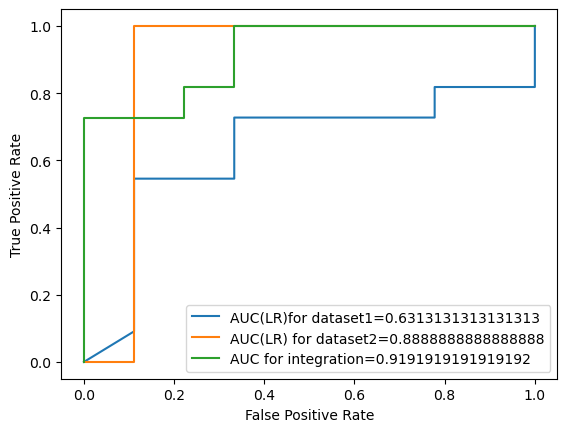

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_pred_1)
auc = roc_auc_score(y_test, y_pred_1)
plt.plot(fpr, tpr, label="AUC(LR)for dataset1=" + str(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_2)
auc = roc_auc_score(y_test, y_pred_2)
plt.plot(fpr, tpr, label="AUC(LR) for dataset2=" + str(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_mesa)
auc = roc_auc_score(y_test, y_pred_mesa)
plt.plot(fpr, tpr, label="AUC for integration=" + str(auc))

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()
